In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Есть датасет с колонками dt (дата и время), quantity_long (общее количество купленных биткойнов на данный момент сделками в количестве strategies_long ), quantity_short (общее количество проданных биткойнов на данный момент сделками в количестве strategies_short ), price (цена на момент времени), strategies_long (количество активных сделок в Лонг, количество стратегий на лонг ), strategies_short (количество активных сделок в шорт, количество стратегий на шорт). 

*Доходность, ликвидность, скользящие средние, просадки стратегий
Технический анализ, фандинг на рынке, карта ликвидации, принтинг   
Открытый интерес*

In [31]:
data = pd.read_csv('../data/reports.csv')

data['dt'] = pd.to_datetime(data['dt'])

In [32]:
data['year'] = data['dt'].dt.year
data['month'] = data['dt'].dt.month
data['day_month'] = data['dt'].dt.day
data['day_week'] = data['dt'].dt.day_name()
data['weekend'] = data['dt'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
data['quarter'] = data['dt'].dt.quarter
data['season'] = data['dt'].apply(lambda x: 'Зима' if x.month in [12, 1, 2] else 
                                         ('Весна' if x.month in [3, 4, 5] else 
                                          ('Лето' if x.month in [6, 7, 8] else 'Осень')))
data['week_year'] = data['dt'].dt.isocalendar().week
data['day_year'] = data['dt'].dt.dayofyear

In [33]:
data.set_index('dt', inplace=True)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate



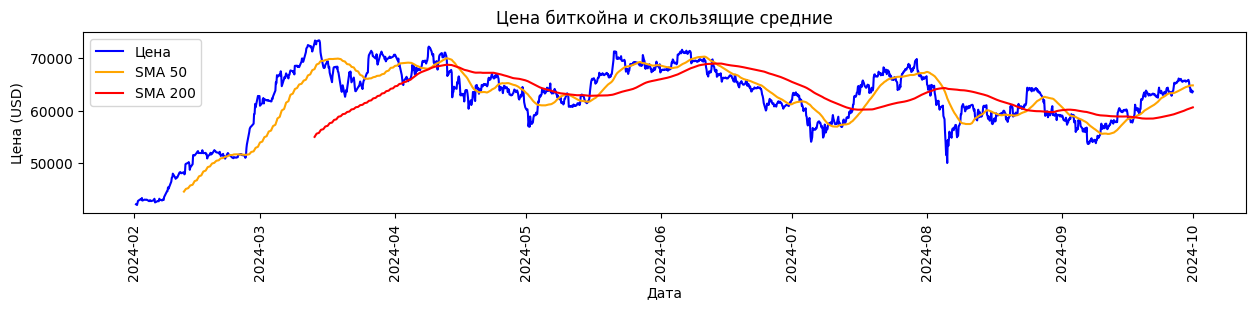

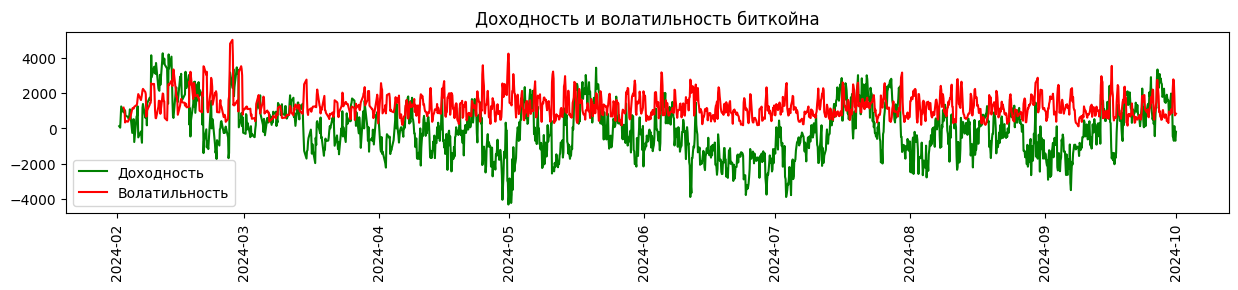

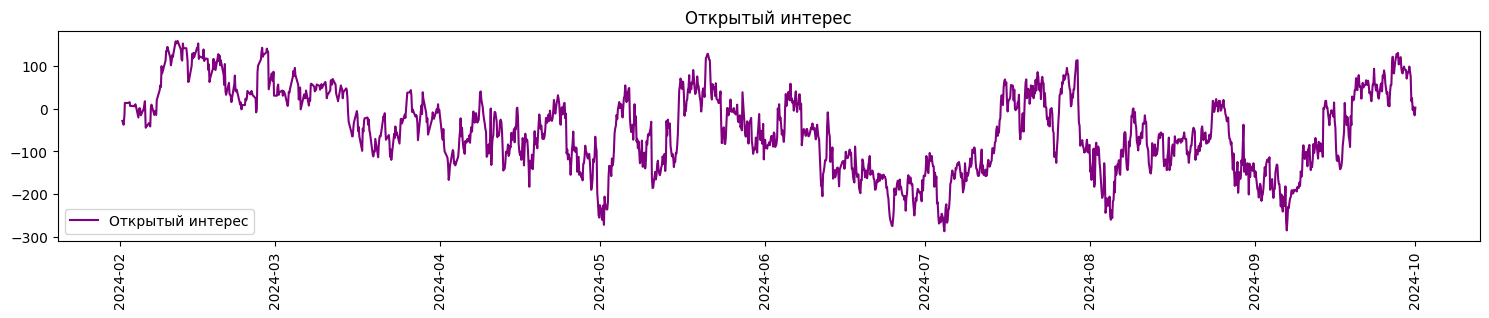

In [34]:
# Расчет доходности
data['return'] = data['price'] * (data['quantity_long'] + data['quantity_short'])

# Расчет волатильности
data['volatility'] = data['return'].rolling(window=5).std() * np.sqrt(5)

data['cumulative_returns'] = (1 + data['return']).cumprod()

# Расчет SMA pandas-ta
data['SMA_50'] = ta.sma(data['price'], length=50)
data['SMA_200'] = ta.sma(data['price'], length=200)

# Расчет RSI pandas-ta
data['RSI_14'] = ta.rsi(data['price'], length=14)

# Расчет открытого интереса 
data['open_interest'] = data['strategies_long'] - data['strategies_short']

# График цены и скользящих средних
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(data.index, data['price'], label='Цена', color='blue')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='orange')
plt.plot(data.index, data['SMA_200'], label='SMA 200', color='red')
plt.title('Цена биткойна и скользящие средние')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.xticks(rotation=90)

# Построение графиков доходности и волатильности
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 2)
plt.plot(data.index, data['return'], label='Доходность', color='green')
plt.plot(data.index, data['volatility'], label='Волатильность', color='red')
plt.title('Доходность и волатильность биткойна')
plt.legend()
plt.xticks(rotation=90)

# Построение графика открытого интереса
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 3)
plt.plot(data.index, data['open_interest'], label='Открытый интерес', color='purple')
plt.title('Открытый интерес')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

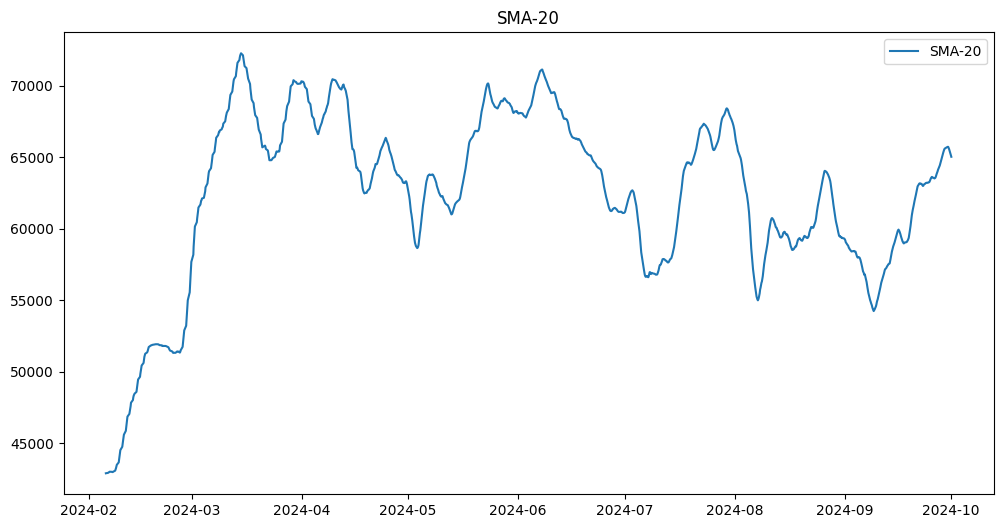

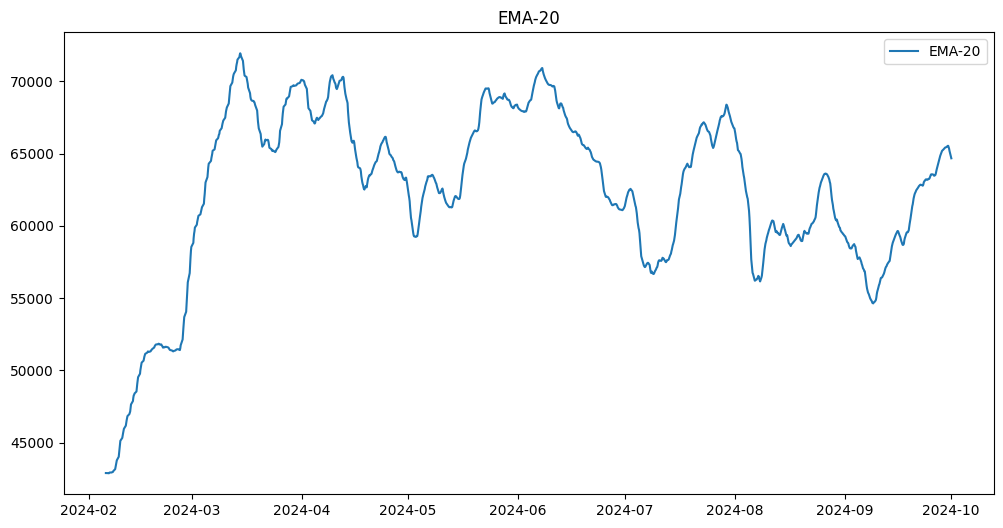

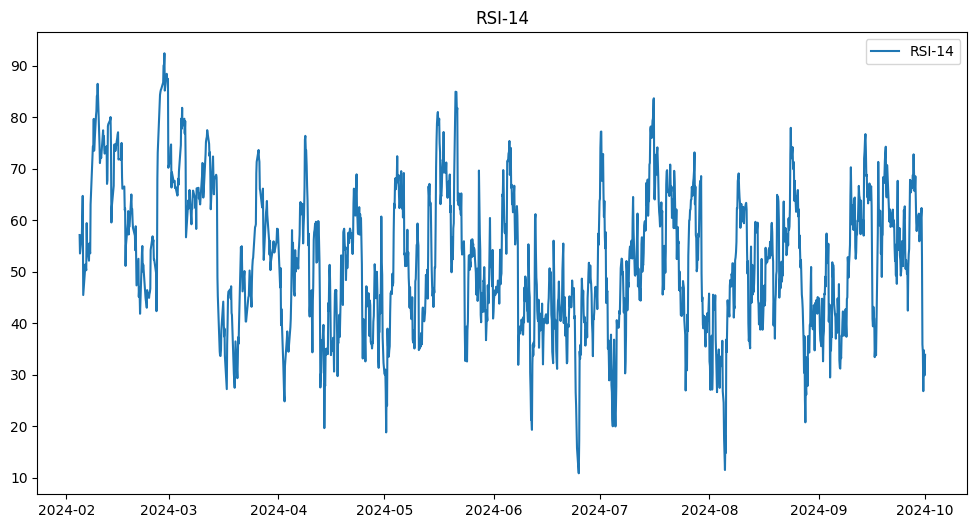

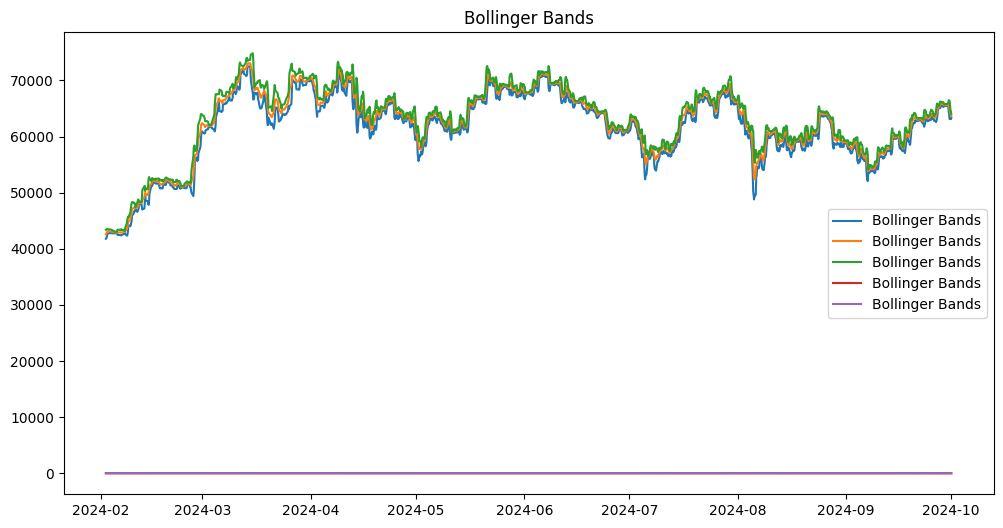

In [6]:
# Технический анализ с помощью pandas_ta
indicators = {
    'SMA-20': ta.sma(data['price'], length=20),
    'EMA-20': ta.ema(data['price'], length=20),
    'RSI-14': ta.rsi(data['price'], length=14),
    'Bollinger Bands': ta.bbands(data['price']),
}

# Построение графиков индикаторов
for indicator_name, indicator_data in indicators.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, indicator_data, label=indicator_name)
    plt.title(indicator_name)
    plt.legend()
    plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1747 entries, 2024-02-01 10:31:16 to 2024-10-01 01:06:29
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity_long       1747 non-null   float64
 1   quantity_short      1747 non-null   float64
 2   price               1747 non-null   float64
 3   strategies_long     1747 non-null   int64  
 4   strategies_short    1747 non-null   int64  
 5   year                1747 non-null   int32  
 6   month               1747 non-null   int32  
 7   day_month           1747 non-null   int32  
 8   day_week            1747 non-null   object 
 9   weekend             1747 non-null   int64  
 10  quarter             1747 non-null   int32  
 11  season              1747 non-null   object 
 12  week_year           1747 non-null   UInt32 
 13  day_year            1747 non-null   int32  
 14  return              1747 non-null   float64
 15  volatility         

In [8]:
df = data.copy()

In [9]:
df.head(5)

quantity_long  quantity_short    price  strategies_long  \
dt                                                                             
2024-02-01 10:31:16          0.026          -0.023  42207.8               72   
2024-02-01 16:09:13          0.030          -0.029  42075.7               72   
2024-02-01 19:59:59          0.042          -0.022  42641.9               82   
2024-02-01 21:37:14          0.046          -0.017  42845.9               95   
2024-02-02 10:29:49          0.037          -0.016  43150.2               97   

                     strategies_short  year  month  day_month  day_week  \
dt                                                                        
2024-02-01 10:31:16               101  2024      2          1  Thursday   
2024-02-01 16:09:13               110  2024      2          1  Thursday   
2024-02-01 19:59:59                96  2024      2          1  Thursday   
2024-02-01 21:37:14                82  2024      2          1  Thursday   
2024-02-02 10:29:49                84  2024      2          2    Friday   

                     weekend  ...  season week_year  day_year     return  \
dt                            ...                                          
2024-02-01 10:31:16        0  ...    Зима         5        32   126.6234   
2024-02-01 16:09:13        0  ...    Зима         5        32    42.0757   
2024-02-01 19:59:59        0  ...    Зима         5        32   852.8380   
2024-02-01 21:37:14        0  ...    Зима         5        32  1242.5311   
2024-02-02 10:29:49        0  ...    Зима         5        33   906.1542   

                     volatility  cumulative_returns  SMA_50  SMA_200  RSI_14  \
dt                                                                             
2024-02-01 10:31:16         NaN        1.276234e+02     NaN      NaN     NaN   
2024-02-01 16:09:13         NaN        5.497467e+03     NaN      NaN     NaN   
2024-02-01 19:59:59         NaN        4.693946e+06     NaN      NaN     NaN   
2024-02-01 21:37:14         NaN        5.837068e+09     NaN      NaN     NaN   
2024-02-02 10:29:49         NaN        5.295121e+12     NaN      NaN     NaN   

                     open_interest  
dt                                  
2024-02-01 10:31:16            -29  
2024-02-01 16:09:13            -38  
2024-02-01 19:59:59            -14  
2024-02-01 21:37:14             13  
2024-02-02 10:29:49             13  

[5 rows x 21 columns]

In [10]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Дата фрейм занимает {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype.name

        if col_type not in ['object', 'category', 'datetime64[ns, UTC]']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'После оптимизации занимает {end_mem:.2f} MB')
    print(f'Снижение на {(start_mem - end_mem) / start_mem:.1%}')

    return df

In [11]:
df = reduce_mem_usage(df)
df.sample(5)

Дата фрейм занимает 0.25 MB
После оптимизации занимает 0.15 MB
Снижение на 39.9%


quantity_long  quantity_short         price  \
dt                                                                 
2024-08-30 13:05:12          0.020          -0.026  59492.800781   
2024-07-26 16:03:36          0.029          -0.012  67289.398438   
2024-03-09 10:32:25          0.020          -0.003  68541.000000   
2024-09-02 19:05:21          0.024          -0.038  58566.000000   
2024-04-05 10:33:39          0.013          -0.016  66953.898438   

                     strategies_long  strategies_short  year  month  \
dt                                                                    
2024-08-30 13:05:12               78               206  2024      8   
2024-07-26 16:03:36              146               111  2024      7   
2024-03-09 10:32:25               83                30  2024      3   
2024-09-02 19:05:21               89               226  2024      9   
2024-04-05 10:33:39               78               171  2024      4   

                     day_month  day_week  weekend  ...  season week_year  \
dt                                                 ...                     
2024-08-30 13:05:12         30    Friday        0  ...    Лето      35.0   
2024-07-26 16:03:36         26    Friday        0  ...    Лето      30.0   
2024-03-09 10:32:25          9  Saturday        1  ...   Весна      10.0   
2024-09-02 19:05:21          2    Monday        0  ...   Осень      36.0   
2024-04-05 10:33:39          5    Friday        0  ...   Весна      14.0   

                     day_year       return   volatility  cumulative_returns  \
dt                                                                            
2024-08-30 13:05:12       243  -356.956787  1871.808472                -inf   
2024-07-26 16:03:36       208  1143.919800  2541.246338                -inf   
2024-03-09 10:32:25        69  1165.197021  1304.541138                 inf   
2024-09-02 19:05:21       246  -819.924011  1662.445679                 inf   
2024-04-05 10:33:39        96  -200.861694  2236.382568                -inf   

                           SMA_50       SMA_200     RSI_14  open_interest  
dt                                                                         
2024-08-30 13:05:12  61852.355469  59845.218750  43.498363           -128  
2024-07-26 16:03:36  66493.406250  61692.542969  62.107719             35  
2024-03-09 10:32:25  64318.371094           NaN  66.310402             53  
2024-09-02 19:05:21  59164.761719  60192.957031  49.061634           -137  
2024-04-05 10:33:39  68736.437500  66513.000000  46.142220            -93  

[5 rows x 21 columns]

In [12]:
df.describe(include="all").T

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count unique     top freq          mean          std  \
quantity_long       1747.0    NaN     NaN  NaN      0.021851     0.014286   
quantity_short      1747.0    NaN     NaN  NaN     -0.024262     0.012985   
price               1747.0    NaN     NaN  NaN   62610.84375   5766.59082   
strategies_long     1747.0    NaN     NaN  NaN    101.525472    40.507276   
strategies_short    1747.0    NaN     NaN  NaN    158.832284    62.251908   
year                1747.0    NaN     NaN  NaN        2024.0          0.0   
month               1747.0    NaN     NaN  NaN      5.852891     2.161465   
day_month           1747.0    NaN     NaN  NaN      15.83858      8.73868   
day_week              1747      7  Sunday  253           NaN          NaN   
weekend             1747.0    NaN     NaN  NaN      0.288495     0.453192   
quarter             1747.0    NaN     NaN  NaN       2.25415     0.726348   
season                1747      4    Лето  736           NaN          NaN   
week_year           1747.0    NaN     NaN  NaN     23.757298     9.496761   
day_year            1747.0    NaN     NaN  NaN    163.313681     66.43789   
return              1747.0    NaN     NaN  NaN   -150.268921   1431.50708   
volatility          1718.0    NaN     NaN  NaN   2001.311523    584.68866   
cumulative_returns  1747.0    NaN     NaN  NaN           NaN          NaN   
SMA_50              1698.0    NaN     NaN  NaN  62852.304688  5029.758789   
SMA_200             1548.0    NaN     NaN  NaN  63420.476562  3264.269043   
RSI_14              1733.0    NaN     NaN  NaN     52.038437    13.489913   
open_interest       1747.0    NaN     NaN  NaN    -57.306812    91.826594   

                             min           25%  \
quantity_long               -0.0         0.012   
quantity_short            -0.076        -0.032   
price               42075.699219  59319.300781   
strategies_long              0.0          71.5   
strategies_short             0.0         118.0   
year                      2024.0        2024.0   
month                        2.0           4.0   
day_month                    1.0           8.0   
day_week                     NaN           NaN   
weekend                      0.0           0.0   
quarter                      1.0           2.0   
season                       NaN           NaN   
week_year                    5.0          16.0   
day_year                    32.0         111.0   
return              -4306.079102  -1186.962646   
volatility            837.035645   1612.357544   
cumulative_returns          -inf           NaN   
SMA_50              44617.628906  59511.230469   
SMA_200             55015.507812  60313.828125   
RSI_14                 10.872103     41.910339   
open_interest             -287.0        -127.0   

                                                                  50%  \
quantity_long                                                   0.018   
quantity_short                                                 -0.022   
price                                                    63464.898438   
strategies_long                                                  91.0   
strategies_short                                                155.0   
year                                                           2024.0   
month                                                             6.0   
day_month                                                        16.0   
day_week                                                          NaN   
weekend                                                           0.0   
quarter                                                           2.0   
season                                                            NaN   
week_year                                                        24.0   
day_year                                                        165.0   
return                                                    -208.839905   
volatility                                               

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

quantity_long           0
quantity_short          0
price                   0
strategies_long         0
strategies_short        0
year                    0
month                   0
day_month               0
day_week                0
weekend                 0
quarter                 0
season                  0
week_year               0
day_year                0
return                  0
volatility             29
cumulative_returns      0
SMA_50                 49
SMA_200               199
RSI_14                 14
open_interest           0
dtype: int64

In [15]:
df.shape

(1747, 21)

In [16]:
df['volatility'] = df['volatility'].fillna(0)
df['SMA_50'] = df['SMA_50'].fillna(0)
df['SMA_200'] = df['SMA_200'].fillna(0)
df['RSI_14'] = df['RSI_14'].fillna(0)

In [17]:
df.isna().sum()

quantity_long         0
quantity_short        0
price                 0
strategies_long       0
strategies_short      0
year                  0
month                 0
day_month             0
day_week              0
weekend               0
quarter               0
season                0
week_year             0
day_year              0
return                0
volatility            0
cumulative_returns    0
SMA_50                0
SMA_200               0
RSI_14                0
open_interest         0
dtype: int64

In [19]:
df = df.drop(
    columns=[
        "return",
        "volatility",
        "cumulative_returns",
        "SMA_50",
        "SMA_200",
        "RSI_14",
        "open_interest"
    ]
)

In [20]:
df.columns

Index(['quantity_long', 'quantity_short', 'price', 'strategies_long',
       'strategies_short', 'year', 'month', 'day_month', 'day_week', 'weekend',
       'quarter', 'season', 'week_year', 'day_year'],
      dtype='object')

In [21]:
num_col = [
    "quantity_long",
    "quantity_short",
    "strategies_long",
    "strategies_short",
    "year",
    "month",
    "day_month",
    "quarter",
    "week_year",
    "day_year",
]

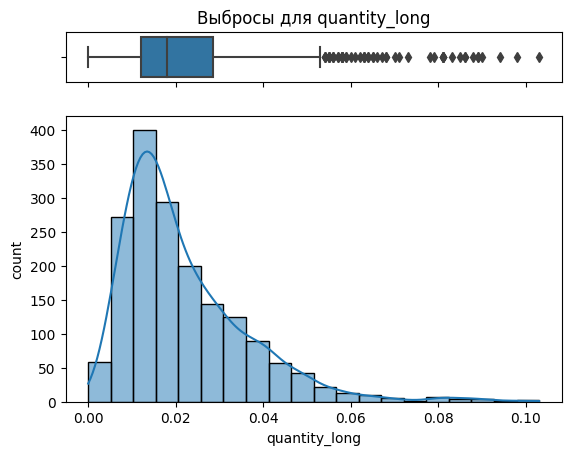

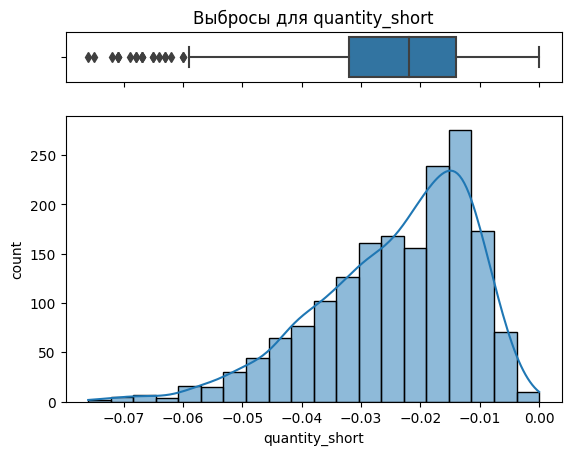

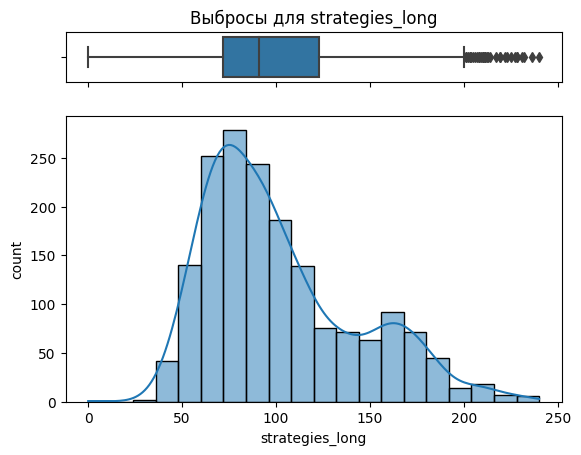

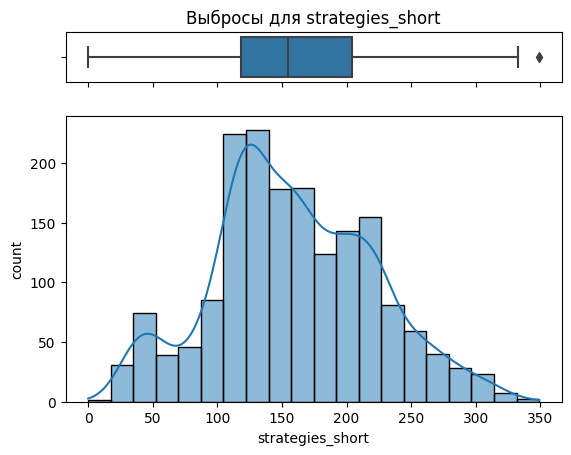

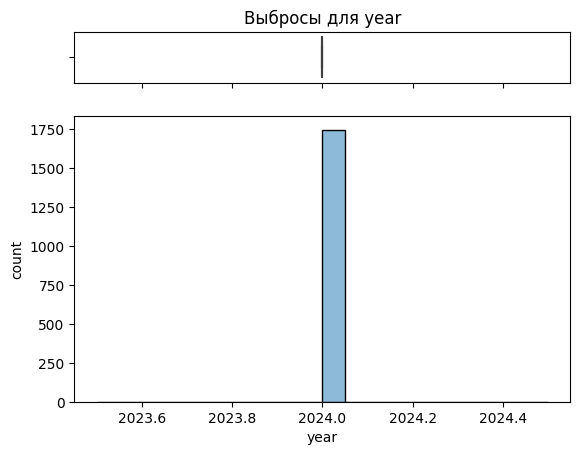

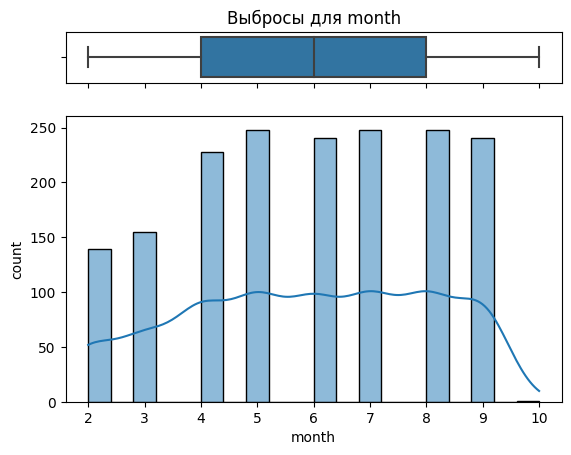

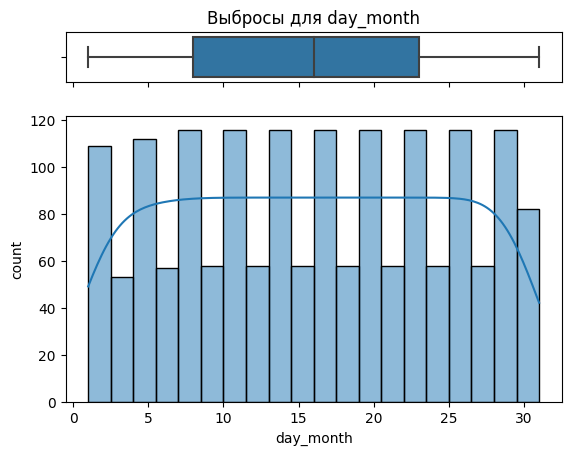

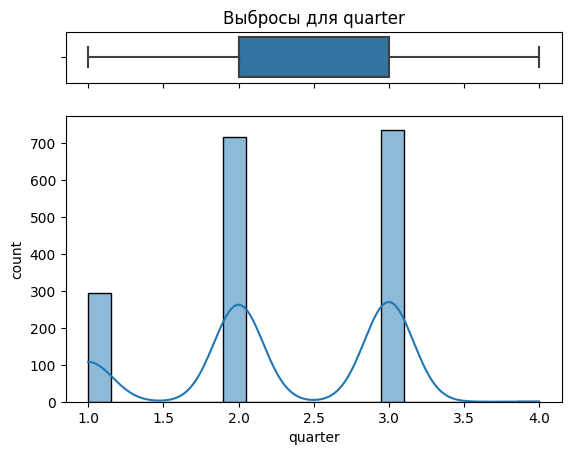

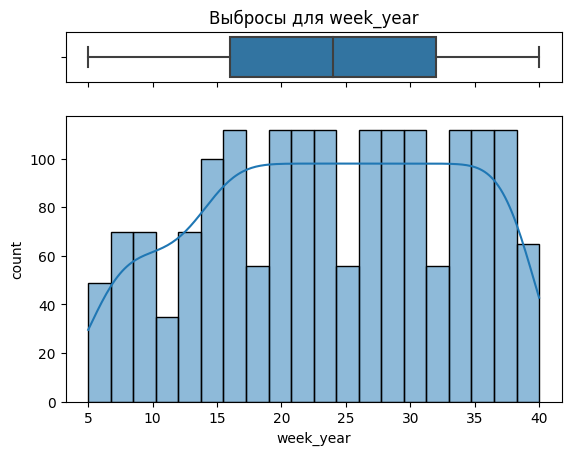

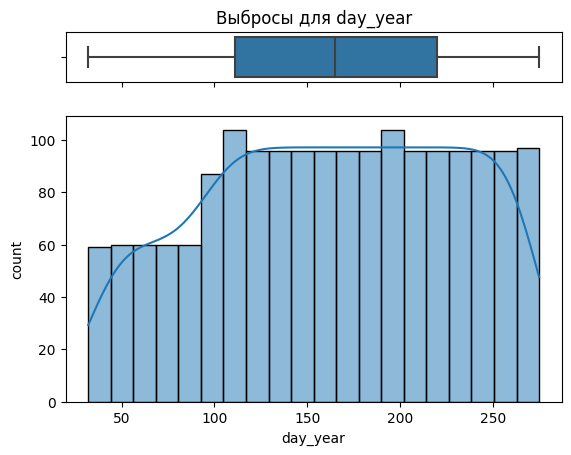

In [22]:
for col in num_col:
    fig, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
    )
    sns.boxplot(x=df[col], ax=ax_box)
    sns.histplot(data=df, x=col, bins=20, kde=True, ax=ax_hist)
    ax_box.set(xlabel="")
    ax_hist.set(xlabel=col)
    ax_hist.set(ylabel="count")
    ax_box.set(title=f"Выбросы для {col}")

    plt.show()

In [23]:
fig = make_subplots(rows=5, cols=2, subplot_titles=num_col)

for i, col in enumerate(num_col):
    row = i // 2 + 1
    col_idx = i % 2 + 1
    hist = go.Histogram(x=df[col], name=col, nbinsx=50)
    fig.add_trace(hist, row=row, col=col_idx)

fig.update_layout(
    title_text='Гистограммы числовых переменных',
    showlegend=False, 
    height=800, 
)

fig.show()

In [24]:
for col in num_col:
    fig = px.box(df, x=col)
    fig.show()

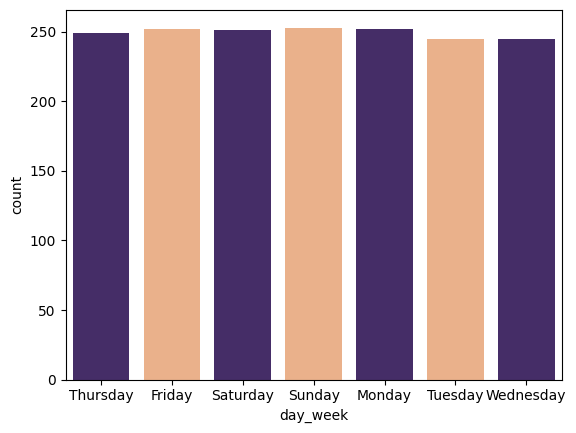

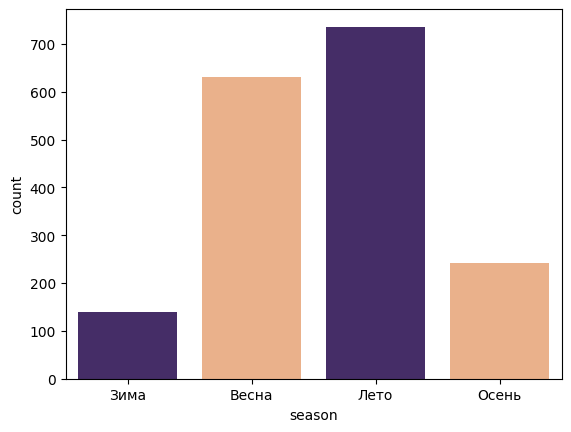

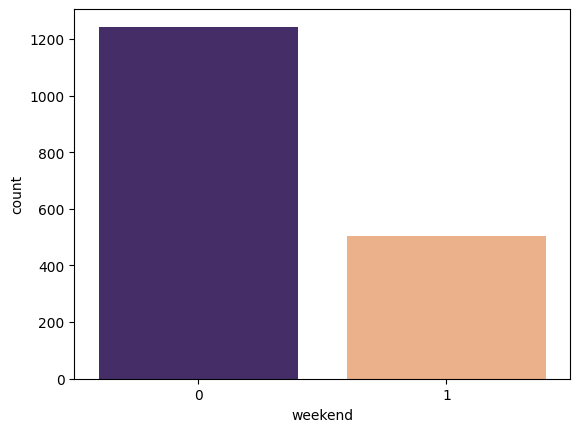

In [25]:
cat_col = ["day_week", "season", "weekend"]

for col in cat_col:
    sns.countplot(df, x=col, palette=["#432371", "#FAAE7B"])
    # plt.yscale('log')
    plt.show()

In [26]:
df.columns

Index(['quantity_long', 'quantity_short', 'price', 'strategies_long',
       'strategies_short', 'year', 'month', 'day_month', 'day_week', 'weekend',
       'quarter', 'season', 'week_year', 'day_year'],
      dtype='object')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\data_quality.py:72: UserWarning:

Not enough unique value for variable year for analysis 1. Dropping this column

C:\Users\user\AppData\Local\Temp\ipykernel_19484\3385323132.py:35: UserWarning:

The figure layout has changed to tight



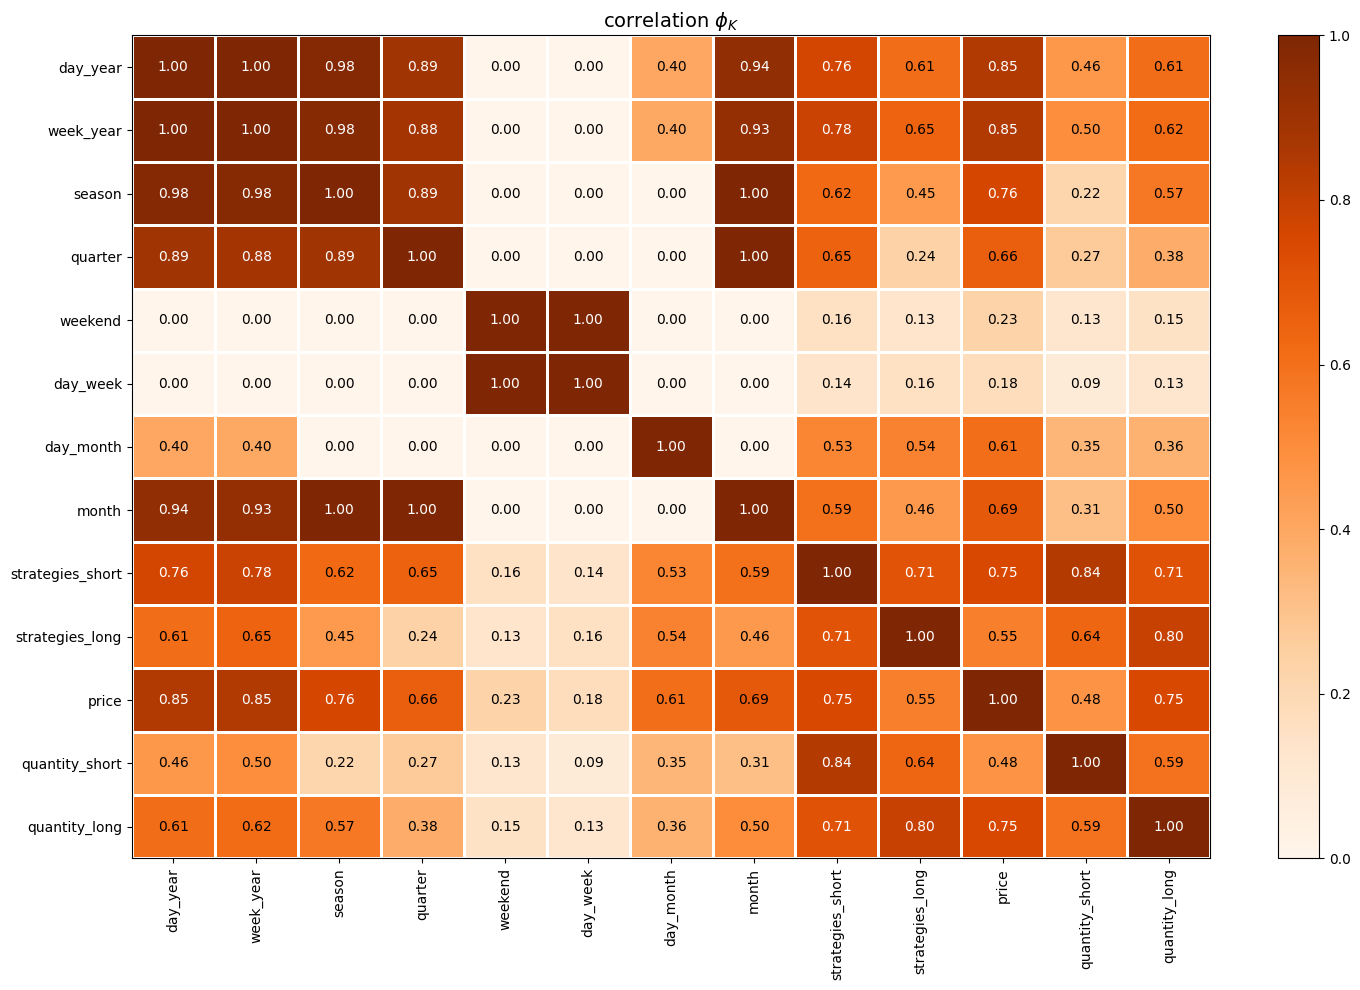

In [27]:
# Построение матрицы корреляции признаков (Phik)
data_types = {
    "quantity_long": "interval",
    "quantity_short": "interval",
    "price": "interval",
    "strategies_long": "interval",
    "strategies_short": "interval",
    "average_loss_long": "interval",
    "year": "interval",
    "month": "interval",
    "day_month": "interval",
    "quarter": "interval",
    "week_year": "interval",
    "day_year": "interval",
}

interval_cols = [
    col for col, v in data_types.items() if v == "interval" and col in df.columns
]

data_binned, binning_dict = bin_data(df, cols=interval_cols, retbins=True)

phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1,
    color_map="Oranges",
    title=r"correlation $\phi_K$",
    figsize=(15, 10),
)
plt.tight_layout()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



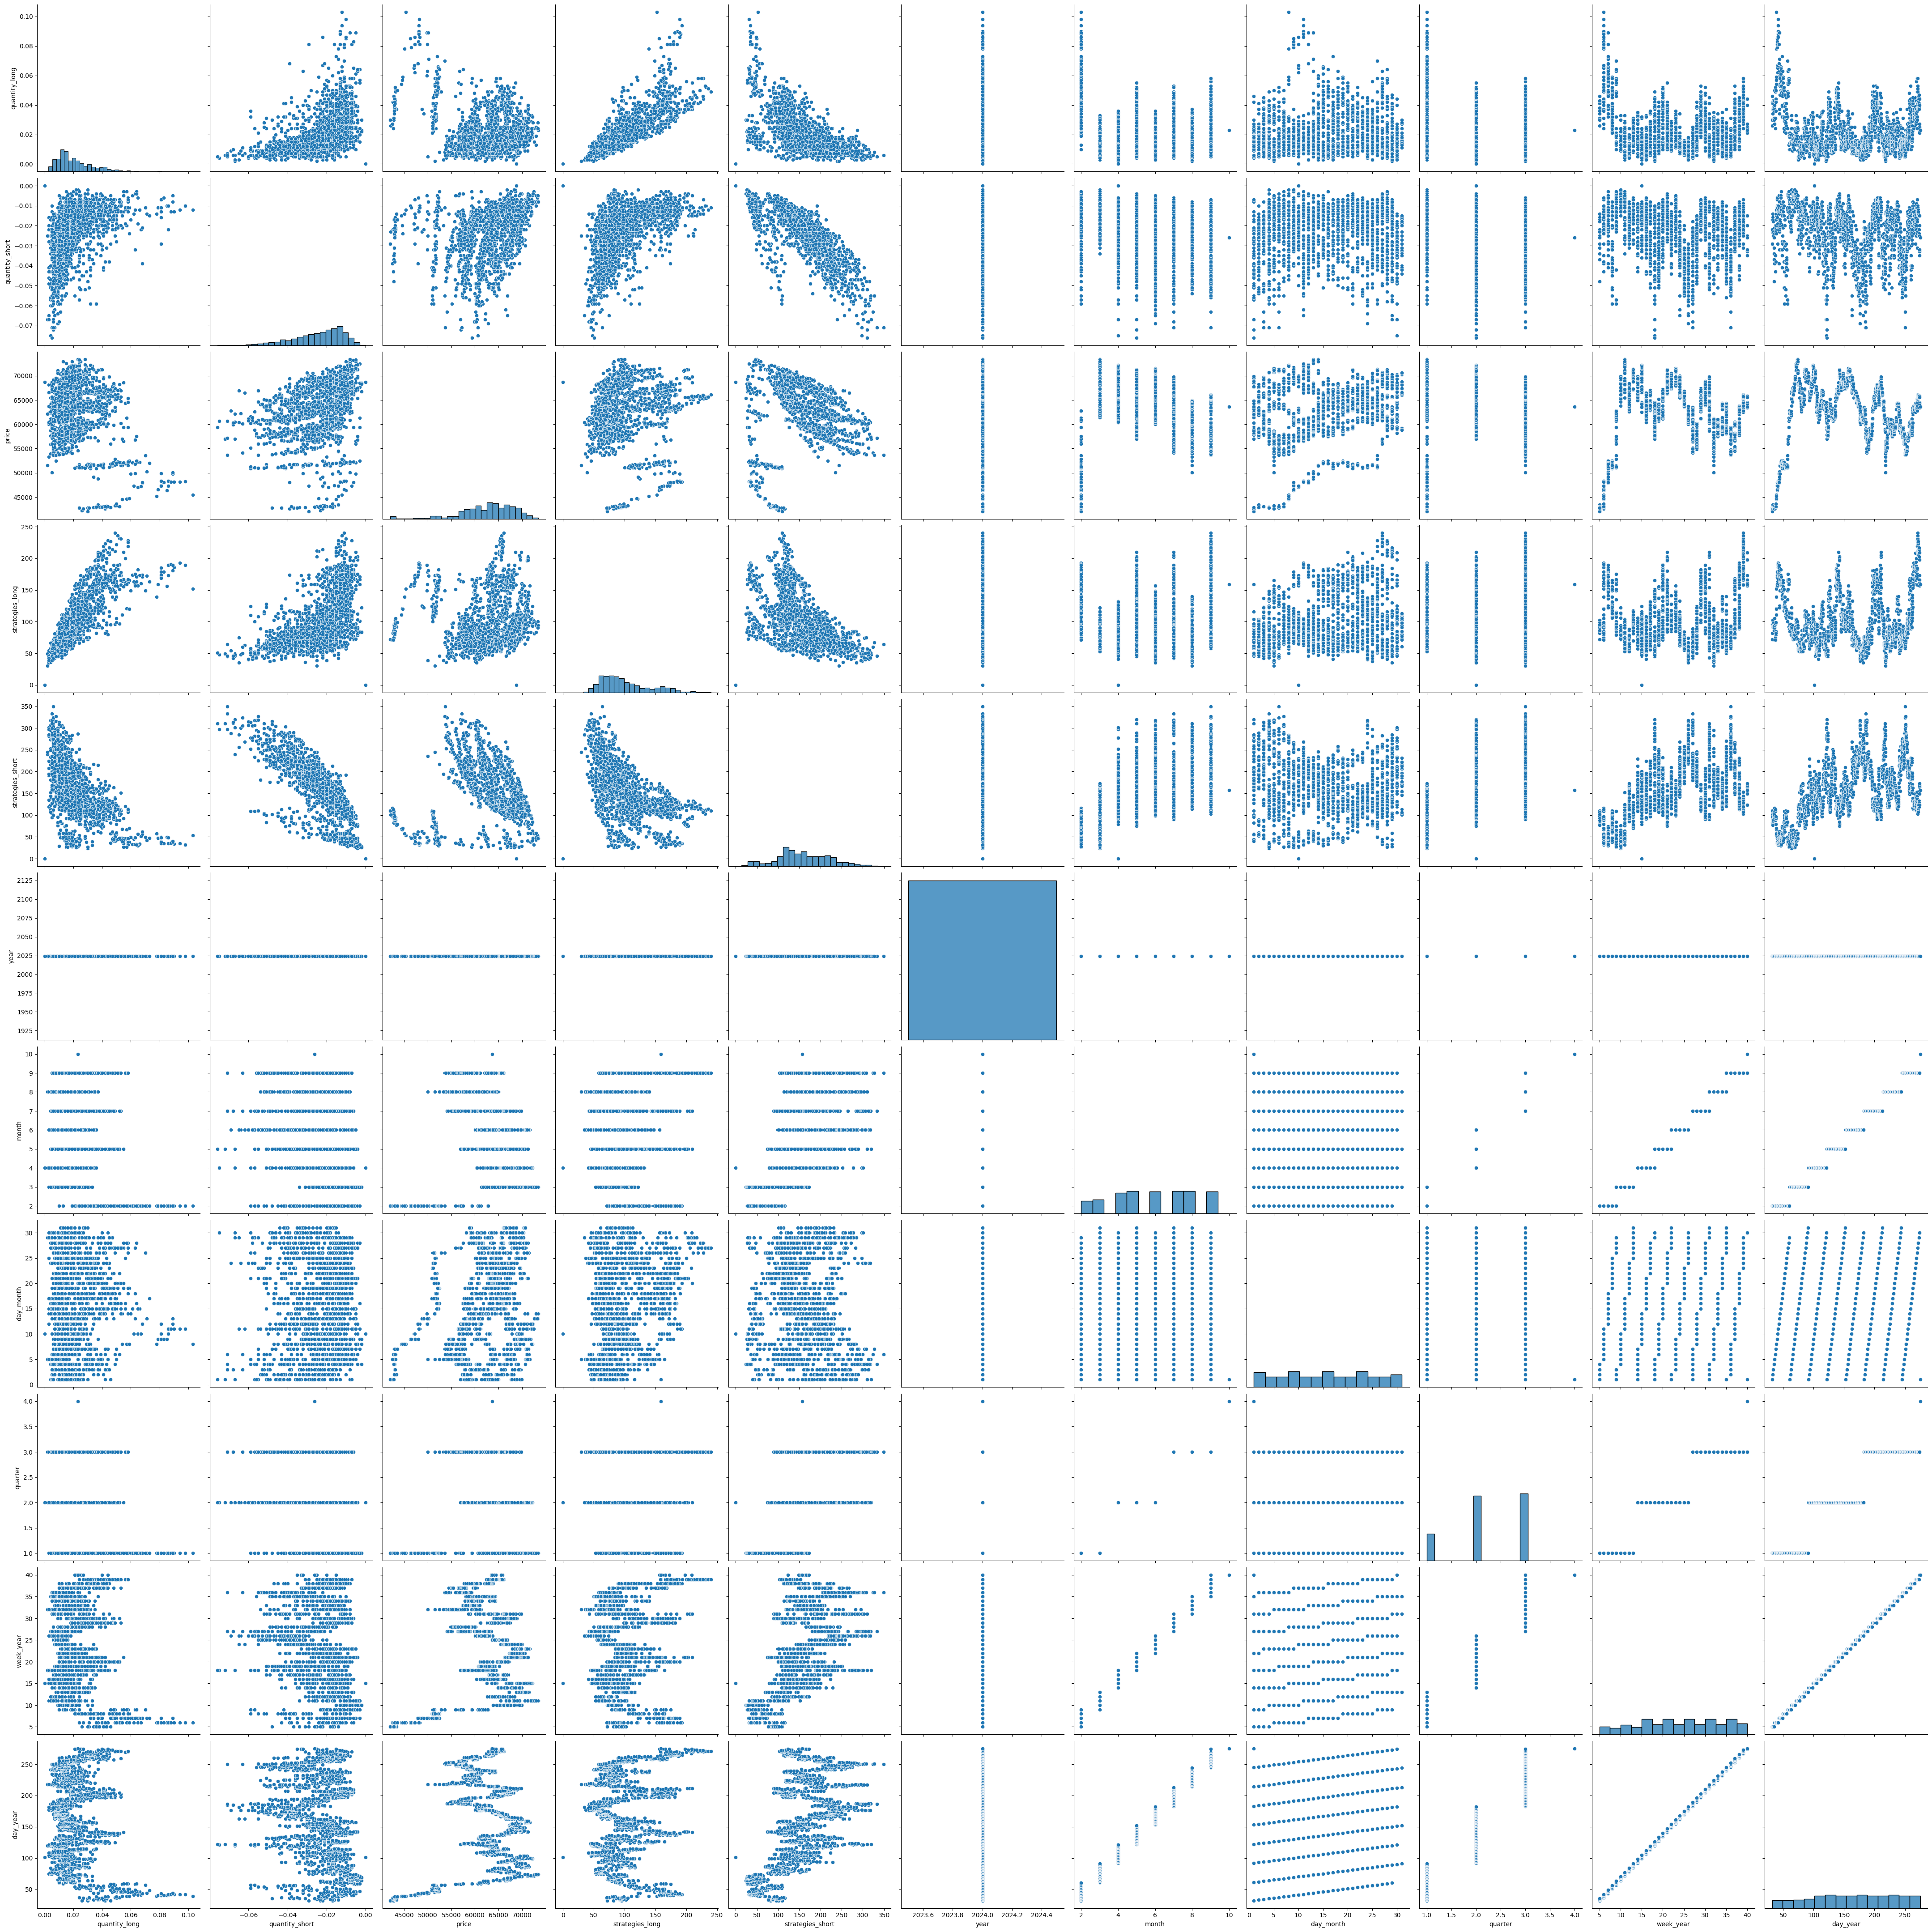

In [30]:
sns.pairplot(
    df[
        [
            "quantity_long",
            "quantity_short",
            "price",
            "strategies_long",
            "strategies_short",
            "year",
            "month",
            "day_month",
            "quarter",
            "week_year",
            "day_year",
        ]
    ],
    height=4,
)